# Assignment 2

In [1]:
#import all necessary libraries
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

import collections
from imblearn.under_sampling import TomekLinks
from numpy import mean
from sklearn.datasets import make_classification

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from IPython.display import clear_output
from scipy.stats import friedmanchisquare
import warnings
warnings.filterwarnings('ignore')

# Dataset D

Referring to Assignment 1, I plan to use Dataset for **Cannabis** as it is a balanced dataset and has the highest accuracy (Random Forest - **82.18%**).

P.S. In Assignment 1 ML models for Alcohol have given the highest accuracy for me but since the dataset is imbalanced I have decided not to use it

In [2]:
#set column names, drug names and feature names in a list (to be referenced ahead)
column_names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']
dependent_features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking']
drug_names = ['Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']

In [3]:
#Loading the Dataset
drug_data = pd.read_csv('data/drug_consumption.data', header = None, names = column_names)
#Using ID Column as index as it does not have any relation with the features
drug_data.set_index('ID', inplace = True)
drug_data.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
#Categorizing Participants as users and non-users on the basis of their Drug usage
#Assumptions: 
#1 - A person is a drug user if they used a drug in last decade, year, month, week or day

#0 - A person is a non-drug user if they never used a drug or used over a decade ago

def change(category):
    if ((category == 'CL6') or (category == 'CL5') or (category == 'CL4') or (category == 'CL2') or (category == 'CL3')):
        category = 1
    elif ((category == 'CL0') or (category == 'CL1')):
        category = 0
    return category

In [5]:
# Updating the dataset to categorize users and non-users of drugs

for column in drug_names:
    drug_data[column] = drug_data[column].map(change)

In [6]:
#Creating a new DataFrame of just independent variables (to be used for building models) 
feature_dataset = drug_data[dependent_features]
len(feature_dataset.index)

1885

## Dependent Feature Scaling - Implemented Standard Scaler

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_feature_dataset = scaler.fit_transform(feature_dataset)
scaled_feature_dataset = pd.DataFrame(scaled_feature_dataset, columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking'])
scaled_feature_dataset.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking
0,0.527566,1.000531,-0.058331,0.864498,2.621090,0.313500,-0.576912,-0.585137,-0.919341,-0.006281,-0.235108,-1.222226
1,-0.128854,-0.999470,2.093200,0.864498,-0.043764,-0.679764,1.944499,1.441683,0.763361,-0.142775,-0.752976,-0.220519
2,0.527566,-0.999470,-0.058331,0.864498,-0.043764,-0.468308,0.807667,-0.850217,-1.625245,-1.016902,-1.453650,0.420129
3,-1.123504,1.000531,1.229126,0.864498,-0.043764,-0.149189,-0.808263,-0.018822,0.592338,0.586885,-1.453650,-1.222226
4,0.527566,1.000531,2.093200,0.864498,-0.043764,0.736994,-1.637850,-0.453034,-0.302329,1.310098,-0.235108,-0.220519


## Feature Selection for Cannabis- ANOVA F-Test

Feature Age: 270.136487
Feature Gender: 81.114769
Feature Education: 43.061725
Feature Country: 328.534896
Feature Ethnicity: 18.036250
Feature Neuroticism: 26.048962
Feature Extraversion: 2.013876
Feature Openness: 181.566792
Feature Agreeableness: 27.140010
Feature Conscientiousness: 125.051056
Feature Impulsiveness: 118.519149
Feature Sensation_seeking: 251.085937


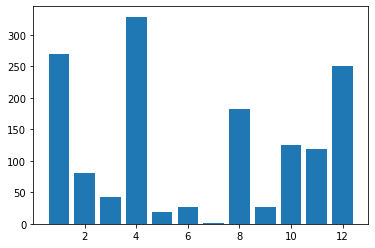

In [8]:
#Load Data in X and Y Dataframes
X_cannabis = scaled_feature_dataset
Y_cannabis = drug_data[["Cannabis"]]

#Perform Train-Test Split
X_cannabis_train, X_cannabis_test, y_cannabis_train, y_cannabis_test = train_test_split(X_cannabis , Y_cannabis, test_size = 0.33, random_state = 42)

# configuration for selecting all features
feature_selection_cannabis = SelectKBest(score_func=f_classif, k=6)
feature_selection_cannabis.fit(X_cannabis_train, y_cannabis_train.values.ravel())
X_cannabis_train_fs = feature_selection_cannabis.transform(X_cannabis_train)
X_cannabis_test_fs = feature_selection_cannabis.transform(X_cannabis_test)

for i in range(len(feature_selection_cannabis.scores_)):
    print('Feature %s: %f' % (dependent_features[i], feature_selection_cannabis.scores_[i]))
# plot the scores
plt.bar([i+1 for i in range(len(feature_selection_cannabis.scores_))], feature_selection_cannabis.scores_)
plt.show()

In [9]:
#Update the datasets after feature selection and performing train-test split
cannabis_features = ['Age', 'Gender', 'Country', 'Openness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking']
X_cannabis = X_cannabis[cannabis_features]
Y_cannabis = drug_data[["Cannabis"]].values.ravel()
collections.Counter(Y_cannabis)

Counter({0: 620, 1: 1265})

## Baseline Method That Sums up Everything

In [10]:
#General MGet Accuracy Method
#Parameters:
#X - Input Fearure Dataframe
#Y - Output Class
#model_name - Algorithm Variable with set parameters
#sampling - Indicates if oversampling/undersampling needs to be done on input feature dataset
def get_model_accuracy(X, Y, model_name, sampling=None):
    accuracy = []
    #Implementing Stratified K Fold to balance the value counts of 0/1 in output variables
    skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    skf.get_n_splits(X, Y)
    #loop for number of splits (10 here)
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        if sampling == "undersampling":
            undersample = TomekLinks()
            X_train, y_train = undersample.fit_resample(X_train, y_train)
        elif sampling == "oversampling":
            oversample = SMOTE()
            X_train, y_train = oversample.fit_resample(X_train, y_train)
        
        model_name.fit(X_train, y_train)
        prediction = model_name.predict(X_test)
        score=accuracy_score(prediction, y_test)
        accuracy.append(score)
    result = np.round(np.array(accuracy).mean()*100,2)
    return result

# Dataset D - No Unsampling

In [11]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy",max_depth = 5, random_state=42)
dt_accuracy = get_model_accuracy(X_cannabis, Y_cannabis, decision_tree_model)
print("Decision Tree Accuracy on no unsampling: "+str(dt_accuracy))

Decision Tree Accuracy on no unsampling: 79.04


In [12]:
#K-Nearest Neighbors
cannabis_KNN_classifier = KNeighborsClassifier(n_neighbors=13)
knn_accuracy = get_model_accuracy(X_cannabis, Y_cannabis, cannabis_KNN_classifier)
print("KNN Accuracy on no unsampling: "+str(knn_accuracy))

KNN Accuracy on no unsampling: 79.84


In [13]:
#Random Forest
cannabis_RF_classifier = RandomForestClassifier(n_estimators = 200, criterion = 'gini', random_state=42)
rf_accuracy = get_model_accuracy(X_cannabis, Y_cannabis, cannabis_RF_classifier)
print("RF Accuracy on no unsampling: "+str(rf_accuracy))

RF Accuracy on no unsampling: 79.73


In [14]:
#Support Vector Machine
cannabis_SVM_classifier = SVC(kernel = 'linear', gamma='auto', C=2, random_state=42)
svm_accuracy = get_model_accuracy(X_cannabis, Y_cannabis, cannabis_SVM_classifier)
print("SVM Accuracy on no unsampling: "+str(svm_accuracy))

SVM Accuracy on no unsampling: 80.96


In [15]:
#Multi Layer Perceptron
cannabis_mlp_classifier = MLPClassifier(hidden_layer_sizes=(6,5), random_state=42, verbose=True, learning_rate_init=0.01)
mlp_accuracy = get_model_accuracy(X_cannabis, Y_cannabis, cannabis_mlp_classifier)
clear_output(wait=True)
print("MLP Accuracy on no unsampling: "+str(mlp_accuracy))

MLP Accuracy on no unsampling: 80.63


In [16]:
#Gradient Boosting Ensemble
cannabis_gb_classifier = GradientBoostingClassifier(n_estimators=500, max_depth=3, learning_rate=0.01, subsample=0.7, random_state=42)
gb_accuracy = get_model_accuracy(X_cannabis, Y_cannabis, cannabis_gb_classifier)
print("MLP Accuracy on no unsampling: "+str(gb_accuracy))

MLP Accuracy on no unsampling: 81.06


# Dataset D1 - SMOTE - Over Sampling

In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree_model_os = DecisionTreeClassifier(criterion="entropy",max_depth = 5, random_state=42)
dt_accuracy_os = get_model_accuracy(X_cannabis, Y_cannabis, decision_tree_model_os, "oversampling")
print("Decision Tree Accuracy on Oversampling: "+str(dt_accuracy_os))

Decision Tree Accuracy on Oversampling: 76.5


In [18]:
#K-Nearest Neighbors
cannabis_KNN_classifier_os = KNeighborsClassifier(n_neighbors=21)
knn_accuracy_os = get_model_accuracy(X_cannabis, Y_cannabis, cannabis_KNN_classifier_os, "oversampling")
print("KNN Accuracy on Oversampling: "+str(knn_accuracy_os))

KNN Accuracy on Oversampling: 78.09


In [19]:
#Random Forest
cannabis_RF_classifier_os = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state=42)
rf_accuracy_os = get_model_accuracy(X_cannabis, Y_cannabis, cannabis_RF_classifier_os, "oversampling")
print("RF Accuracy on Oversampling: "+str(rf_accuracy_os))

RF Accuracy on Oversampling: 79.57


In [20]:
#Support Vector Machine
cannabis_SVM_classifier_os = SVC(kernel = 'rbf', gamma='auto', C=2, random_state=42)
svm_accuracy_os = get_model_accuracy(X_cannabis, Y_cannabis, cannabis_SVM_classifier_os, "oversampling")
print("SVM Accuracy on Oversampling: "+str(svm_accuracy_os))

SVM Accuracy on Oversampling: 78.57


In [21]:
#Multi Layer Perceptron
cannabis_mlp_classifier_os = MLPClassifier(hidden_layer_sizes=(6,5), random_state=42, verbose=True, learning_rate_init=0.01)
mlp_accuracy_os = get_model_accuracy(X_cannabis, Y_cannabis, cannabis_mlp_classifier_os, "oversampling")
clear_output(wait=True)
print("MLP Accuracy on Oversampling: "+str(mlp_accuracy_os))

MLP Accuracy on Oversampling: 79.15


In [22]:
#Gradient Boosting Ensemble
cannabis_gb_classifier_os = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, subsample=0.7)
gb_accuracy_os = get_model_accuracy(X_cannabis, Y_cannabis, cannabis_gb_classifier_os, "oversampling")
print("MLP Accuracy on no unsampling: "+str(gb_accuracy_os))

MLP Accuracy on no unsampling: 81.0


# Dataset D2 - Tomeklinks Under Sampling

In [23]:
#Decision Tree
decision_tree_model_us = DecisionTreeClassifier(criterion="entropy",max_depth = 5, random_state=42)
dt_accuracy_us = get_model_accuracy(X_cannabis, Y_cannabis, decision_tree_model_us, "undersampling")
print("Decision Tree Accuracy on Undersampling: "+str(dt_accuracy_us))

Decision Tree Accuracy on Undersampling: 79.15


In [24]:
#K-Nearest Neighbors
cannabis_KNN_classifier_us = KNeighborsClassifier(n_neighbors=19)
knn_accuracy_us = get_model_accuracy(X_cannabis, Y_cannabis, cannabis_KNN_classifier_us, "undersampling")
print("KNN Accuracy on Undersampling: "+str(knn_accuracy_us))

KNN Accuracy on Undersampling: 79.79


In [25]:
#Random Forest
cannabis_RF_classifier_us = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state=42)
rf_accuracy_us = get_model_accuracy(X_cannabis, Y_cannabis, cannabis_RF_classifier_us, "undersampling")
print("RF Accuracy on Undersampling: "+str(rf_accuracy_us))

RF Accuracy on Undersampling: 79.89


In [26]:
#Support Vector Machine
cannabis_SVM_classifier_us = SVC(kernel = 'linear', gamma='auto', C=2, random_state=42)
svm_accuracy_us = get_model_accuracy(X_cannabis, Y_cannabis, cannabis_SVM_classifier_us, "undersampling")
print("SVM Accuracy on Undersampling: "+str(svm_accuracy_us))

SVM Accuracy on Undersampling: 80.48


In [27]:
#Multi Layer Perceptron
cannabis_mlp_classifier_us = MLPClassifier(hidden_layer_sizes=(6,5), random_state=42, verbose=True, learning_rate_init=0.01)
mlp_accuracy_us = get_model_accuracy(X_cannabis, Y_cannabis, cannabis_mlp_classifier_us, "undersampling")
clear_output(wait=True)
print("MLP Accuracy on Oversampling: "+str(mlp_accuracy_us))

MLP Accuracy on Oversampling: 80.0


In [28]:
#Gradient Boosting Ensemble
cannabis_gb_classifier_us = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.01, subsample=0.7, random_state=42)
gb_accuracy_us = get_model_accuracy(X_cannabis, Y_cannabis, cannabis_gb_classifier_us, "undersampling")
print("GB Accuracy on no unsampling: "+str(gb_accuracy_us))

GB Accuracy on no unsampling: 81.17


# Labor Negotiations Dataset

In [29]:
labornegotiations_data = pd.read_csv("data/labor-negotiations.csv", na_values = "?")

In [30]:
labornegotiations_data.head()

,duration,wage-increase-first-year,wage-increase-second-year,wage-increase-third-year,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan,class
0,1.0,5.0,NaN,NaN,NaN,40.0,NaN,NaN,2.0,NaN,11.0,average,NaN,NaN,yes,NaN,good
1,2.0,4.5,5.8,NaN,NaN,35.0,ret_allw,NaN,NaN,yes,11.0,below_average,NaN,full,NaN,full,good
2,NaN,NaN,NaN,NaN,NaN,38.0,empl_contr,NaN,5.0,NaN,11.0,generous,yes,half,yes,half,good
3,3.0,3.7,4.0,5.0,tc,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,yes,NaN,good
4,3.0,4.5,4.5,5.0,NaN,40.0,NaN,NaN,NaN,NaN,12.0,average,NaN,half,yes,half,good


In [31]:
print(labornegotiations_data.isna().sum())

duration                           1
wage-increase-first-year           1
wage-increase-second-year         11
wage-increase-third-year          42
cost-of-living-adjustment         20
working-hours                      6
pension                           30
standby-pay                       48
shift-differential                26
education-allowance               35
statutory-holidays                 4
vacation                           6
longterm-disability-assistance    29
contribution-to-dental-plan       20
bereavement-assistance            27
contribution-to-health-plan       20
class                              0
dtype: int64


Dropping the following features as more than 40% of the data is missing.

Features Dropped:
1. wage-increase-third-year
2. pension
3. standby-pay
4. shift-differential
5. education-allowance
6. longterm-disability-assistance
7. bereavement-assistance

Using the following features and will Impute the missing values

1. duration
2. wage-increase-first-year
3. wage-increase-second-year
4. cost-of-living-adjustment
5. working-hours
6. statutory-holidays
7. vacation
8. contribution-to-dental-plan
9. contribution-to-health-plan

In [32]:
select_features= ["duration", "wage-increase-first-year", "wage-increase-second-year", "cost-of-living-adjustment", "working-hours", "statutory-holidays", "vacation", "contribution-to-dental-plan", "contribution-to-health-plan"]

In [33]:
labornegotiations_data_X = labornegotiations_data[select_features]
labornegotiations_data_Y = labornegotiations_data[["class"]].replace({"good":1, "bad":0})
labornegotiations_data_X.head()

,duration,wage-increase-first-year,wage-increase-second-year,cost-of-living-adjustment,working-hours,statutory-holidays,vacation,contribution-to-dental-plan,contribution-to-health-plan
0,1.0,5.0,NaN,NaN,40.0,11.0,average,NaN,NaN
1,2.0,4.5,5.8,NaN,35.0,11.0,below_average,full,full
2,NaN,NaN,NaN,NaN,38.0,11.0,generous,half,half
3,3.0,3.7,4.0,tc,NaN,NaN,NaN,NaN,NaN
4,3.0,4.5,4.5,NaN,40.0,12.0,average,half,half


In [34]:
labornegotiations_data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     56 non-null     float64
 1   wage-increase-first-year     56 non-null     float64
 2   wage-increase-second-year    46 non-null     float64
 3   cost-of-living-adjustment    37 non-null     object 
 4   working-hours                51 non-null     float64
 5   statutory-holidays           53 non-null     float64
 6   vacation                     51 non-null     object 
 7   contribution-to-dental-plan  37 non-null     object 
 8   contribution-to-health-plan  37 non-null     object 
dtypes: float64(5), object(4)
memory usage: 4.1+ KB


In [35]:
#Imputing Missing values and Label Encoding for Categorical Variables
from sklearn import preprocessing
categorical_features = ["cost-of-living-adjustment", "vacation", "contribution-to-dental-plan", "contribution-to-health-plan"]

label_encoder = preprocessing.LabelEncoder()
for i in categorical_features:
    labornegotiations_data_X[i] = labornegotiations_data_X[i].fillna(labornegotiations_data_X[i].mode().iloc[0])
    labornegotiations_data_X[i]= label_encoder.fit_transform(labornegotiations_data_X[i])
labornegotiations_data_X.head()

,duration,wage-increase-first-year,wage-increase-second-year,cost-of-living-adjustment,working-hours,statutory-holidays,vacation,contribution-to-dental-plan,contribution-to-health-plan
0,1.0,5.0,NaN,0,40.0,11.0,0,1,0
1,2.0,4.5,5.8,0,35.0,11.0,1,0,0
2,NaN,NaN,NaN,0,38.0,11.0,2,1,1
3,3.0,3.7,4.0,1,NaN,NaN,1,1,0
4,3.0,4.5,4.5,0,40.0,12.0,0,1,1


In [36]:
#Impute Numerical Data using KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
X_imputed = np.around(imputer.fit_transform(labornegotiations_data_X), decimals=2)
labornegotiations_data_X = pd.DataFrame(X_imputed, labornegotiations_data_X.index, labornegotiations_data_X.columns)
labornegotiations_data_X.head()

,duration,wage-increase-first-year,wage-increase-second-year,cost-of-living-adjustment,working-hours,statutory-holidays,vacation,contribution-to-dental-plan,contribution-to-health-plan
0,1.00,5.00,4.33,0.0,40.00,11.00,0.0,1.0,0.0
1,2.00,4.50,5.80,0.0,35.00,11.00,1.0,0.0,0.0
2,2.33,4.33,5.30,0.0,38.00,11.00,2.0,1.0,1.0
3,3.00,3.70,4.00,1.0,32.67,12.33,1.0,1.0,0.0
4,3.00,4.50,4.50,0.0,40.00,12.00,0.0,1.0,1.0


In [37]:
print(labornegotiations_data_X.isna().sum())

duration                       0
wage-increase-first-year       0
wage-increase-second-year      0
cost-of-living-adjustment      0
working-hours                  0
statutory-holidays             0
vacation                       0
contribution-to-dental-plan    0
contribution-to-health-plan    0
dtype: int64


### Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_labor_dataset = scaler.fit_transform(labornegotiations_data_X)
labornegotiations_data_X = pd.DataFrame(scaled_labor_dataset, columns = labornegotiations_data_X.columns)
labornegotiations_data_X.head()

,duration,wage-increase-first-year,wage-increase-second-year,cost-of-living-adjustment,working-hours,statutory-holidays,vacation,contribution-to-dental-plan,contribution-to-health-plan
0,-1.672869,0.880636,0.273073,-0.558819,0.805717,-0.081480,-1.291544,0.113684,-0.604210
1,-0.235306,0.509746,1.641541,-0.558819,-1.179494,-0.081480,0.023063,-1.506314,-0.604210
2,0.239089,0.383644,1.176076,-0.558819,0.011633,-0.081480,1.337670,0.113684,0.773389
3,1.202256,-0.083678,-0.034134,0.826080,-2.104602,1.009862,0.023063,0.113684,-0.604210
4,1.202256,0.509746,0.431331,-0.558819,0.805717,0.739078,-1.291544,0.113684,0.773389


### 10 Fold CV - Labor Dataset - No Unsampling

In [39]:
#Decision Tree
dt_model_labor = DecisionTreeClassifier(criterion="entropy",max_depth = 4, random_state=42)
dt_accuracy_labor = get_model_accuracy(labornegotiations_data_X, labornegotiations_data_Y.values.ravel(), dt_model_labor)
print("Decision Tree Accuracy for Labor Negotiations Dataset: "+str(dt_accuracy_labor))

Decision Tree Accuracy for Labor Negotiations Dataset: 82.33


In [40]:
#K-Nearest Neighbors
knn_model_labor = KNeighborsClassifier(n_neighbors=5)
knn_accuracy_labor = get_model_accuracy(labornegotiations_data_X, labornegotiations_data_Y.values.ravel(), knn_model_labor)
print("KNN Accuracy for Labor Negotiations Dataset: "+str(knn_accuracy_labor))

KNN Accuracy for Labor Negotiations Dataset: 93.0


In [41]:
#Random Forest
rf_model_labor = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=42)
rf_accuracy_labor = get_model_accuracy(labornegotiations_data_X, labornegotiations_data_Y.values.ravel(), rf_model_labor)
print("RF Accuracy for Labor Negotiations Dataset "+str(rf_accuracy_labor))

RF Accuracy for Labor Negotiations Dataset 93.33


In [42]:
#Support Vector Machine
svm_model_labor = SVC(kernel = 'rbf', gamma='auto', C=2)
svm_accuracy_labor = get_model_accuracy(labornegotiations_data_X, labornegotiations_data_Y.values.ravel(), svm_model_labor)
print("SVM Accuracy for Labor Negotiations Dataset: "+str(svm_accuracy_labor))

SVM Accuracy for Labor Negotiations Dataset: 94.67


In [43]:
#Multi Layer Perceptron
mlp_model_labor = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, verbose=True, learning_rate_init=0.01)
mlp_accuracy_labor = get_model_accuracy(labornegotiations_data_X, labornegotiations_data_Y.values.ravel(), mlp_model_labor)
clear_output(wait=True)
print("MLP Accuracy on no unsampling: "+str(mlp_accuracy_labor))

MLP Accuracy on no unsampling: 92.67


In [44]:
#Gradient Boosting Ensemble
gb_model_labor = GradientBoostingClassifier(n_estimators=300, max_depth=6, learning_rate=0.1, subsample=0.3)
gb_accuracy_labor = get_model_accuracy(labornegotiations_data_X, labornegotiations_data_Y.values.ravel(), gb_model_labor)
print("GB Accuracy on no unsampling: "+str(gb_accuracy_labor))

GB Accuracy on no unsampling: 93.33


# Heart Disease Dataset

In [45]:
heart_disease_data = pd.read_csv("data/heart.csv")
print("Shape: ",heart_disease_data.shape)
heart_disease_data.head()

Shape:  (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
print(heart_disease_data.isna().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [47]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Feature Scaling

In [48]:
heart_disease_X = heart_disease_data.drop(columns="output", axis=1)
heart_disease_Y = heart_disease_data["output"]

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_heart_disease_dataset = scaler.fit_transform(heart_disease_X)
heart_disease_X = pd.DataFrame(scaled_heart_disease_dataset, columns = heart_disease_X.columns)
heart_disease_X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


Feature age: 8.015291
Feature sex: 20.579435
Feature cp: 52.313982
Feature trtbps: 0.312213
Feature chol: 0.120194
Feature fbs: 0.294538
Feature restecg: 0.914169
Feature thalachh: 36.817161
Feature exng: 50.260859
Feature oldpeak: 44.046460
Feature slp: 25.093069
Feature caa: 57.907549
Feature thall: 34.747238


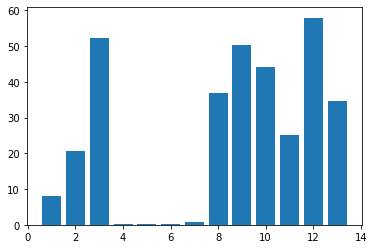

In [50]:
#Perform Train-Test Split
feature_list = heart_disease_X.columns
X_heartdisease_train, X_heartdisease_test, y_heartdisease_train, y_heartdisease_test = train_test_split(heart_disease_X , heart_disease_Y, test_size = 0.33, random_state = 42)

# configuration for selecting all features
feature_selection_heartdisease = SelectKBest(score_func=f_classif, k=6)
feature_selection_heartdisease.fit(X_heartdisease_train, y_heartdisease_train.values.ravel())

for i in range(len(feature_selection_heartdisease.scores_)):
    print('Feature %s: %f' % (feature_list[i], feature_selection_heartdisease.scores_[i]))
# plot the scores
plt.bar([i+1 for i in range(len(feature_selection_heartdisease.scores_))], feature_selection_heartdisease.scores_)
plt.show()

In [51]:
select_features = ["sex", "cp", "exng", "oldpeak", "slp", "caa"]
heart_disease_X = heart_disease_X[select_features]

### 10 Fold CV - Heart Disease Dataset - No Unsampling

In [52]:
#Decision Tree
dt_model_heartdisease = DecisionTreeClassifier(criterion="gini",max_depth = 4, random_state=42)
dt_accuracy_heartdisease = get_model_accuracy(heart_disease_X, heart_disease_Y.values.ravel(), dt_model_heartdisease)
print("Decision Tree Accuracy for Heart Disease Dataset: "+str(dt_accuracy_heartdisease))

Decision Tree Accuracy for Heart Disease Dataset: 81.46


In [53]:
#K-Nearest Neighbors
knn_model_heartdisease = KNeighborsClassifier(n_neighbors=29)
knn_accuracy_heartdisease = get_model_accuracy(heart_disease_X, heart_disease_Y.values.ravel(), knn_model_heartdisease)
print("KNN Accuracy for Heart Disease Dataset: "+str(knn_accuracy_heartdisease))

KNN Accuracy for Heart Disease Dataset: 81.13


In [54]:
#Random Forest
rf_model_heartdisease = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')
rf_accuracy_heartdisease = get_model_accuracy(heart_disease_X, heart_disease_Y.values.ravel(), rf_model_heartdisease)
print("RF Accuracy for Heart Disease Dataset "+str(rf_accuracy_heartdisease))

RF Accuracy for Heart Disease Dataset 83.44


In [55]:
#Support Vector Machine
svm_model_heartdisease = SVC(kernel = 'poly', gamma='auto', C=1, degree=3)
svm_accuracy_heartdisease = get_model_accuracy(heart_disease_X, heart_disease_Y.values.ravel(), svm_model_heartdisease)
print("SVM Accuracy for Heart Disease Dataset: "+str(svm_accuracy_heartdisease))

SVM Accuracy for Heart Disease Dataset: 85.1


In [56]:
#Multi Layer Perceptron
mlp_model_heartdisease = MLPClassifier(hidden_layer_sizes=(6,5), random_state=42, verbose=True, learning_rate_init=0.01)
mlp_accuracy_heartdisease = get_model_accuracy(heart_disease_X, heart_disease_Y.values.ravel(), mlp_model_heartdisease)
clear_output(wait=True)
print("MLP Accuracy for Heart Disease Dataset: "+str(mlp_accuracy_heartdisease))

MLP Accuracy for Heart Disease Dataset: 85.13


In [57]:
#Gradient Boosting Ensemble
gb_model_heartdisease = GradientBoostingClassifier(n_estimators=200, max_depth=3, subsample=0.5, learning_rate=0.01)
gb_accuracy_heartdisease = get_model_accuracy(heart_disease_X, heart_disease_Y.values.ravel(), gb_model_heartdisease)
print("GD Accuracy for Heart Disease Dataset: "+str(gb_accuracy_heartdisease))

GD Accuracy for Heart Disease Dataset: 83.11


In [58]:
from tabulate import tabulate
d = ['Dataset D', dt_accuracy, knn_accuracy, rf_accuracy, svm_accuracy, mlp_accuracy, gb_accuracy]
db1 = ['Dataset DB1', dt_accuracy_os, knn_accuracy_os, rf_accuracy_os, svm_accuracy_os, mlp_accuracy_os, gb_accuracy_os]
db2 = ['Dataset DB2', dt_accuracy_us, knn_accuracy_us, rf_accuracy_us, svm_accuracy_us, mlp_accuracy_us, gb_accuracy_us]
labordb = ['Labor Negotiations', dt_accuracy_labor, knn_accuracy_labor, rf_accuracy_labor, svm_accuracy_labor, mlp_accuracy_labor, gb_accuracy_labor]
heartdiseasedb = ['Heart Disease', dt_accuracy_heartdisease, knn_accuracy_heartdisease, rf_accuracy_heartdisease, svm_accuracy_heartdisease, mlp_accuracy_heartdisease, gb_accuracy_heartdisease]

dataset_list=[d, db1, db2, labordb, heartdiseasedb]

accuracy_dataframe = pd.DataFrame(dataset_list, columns=["Dataset Name", "DT", "KNN", "RF", "SVM", "MLP", "GB"])
accuracy_dataframe = accuracy_dataframe.set_index(list(accuracy_dataframe)[0])
accuracy_dataframe

,DT,KNN,RF,SVM,MLP,GB
Dataset Name,,,,,,
Dataset D,79.04,79.84,79.73,80.96,80.63,81.06
Dataset DB1,76.50,78.09,79.57,78.57,79.15,81.00
Dataset DB2,79.15,79.79,79.89,80.48,80.00,81.17
Labor Negotiations,82.33,93.00,93.33,94.67,92.67,93.33
Heart Disease,81.46,81.13,83.44,85.10,85.13,83.11


In [59]:
rank_df = accuracy_dataframe.rank(1, ascending=False, method='min')
rank_df

,DT,KNN,RF,SVM,MLP,GB
Dataset Name,,,,,,
Dataset D,6.0,4.0,5.0,2.0,3.0,1.0
Dataset DB1,6.0,5.0,2.0,4.0,3.0,1.0
Dataset DB2,6.0,5.0,4.0,2.0,3.0,1.0
Labor Negotiations,6.0,4.0,2.0,1.0,5.0,2.0
Heart Disease,5.0,6.0,3.0,2.0,1.0,4.0


In [60]:
rank_df.mean()

DT     5.8
KNN    4.8
RF     3.2
SVM    2.2
MLP    3.0
GB     1.8
dtype: float64

In [61]:
statistic, p_value = friedmanchisquare(accuracy_dataframe["DT"], 
                                       accuracy_dataframe["KNN"], 
                                       accuracy_dataframe["RF"], 
                                       accuracy_dataframe["SVM"], accuracy_dataframe["MLP"], accuracy_dataframe["GB"])

print("Statistic: ", round(statistic, 4), "P - Value: ",round(p_value,4))

Statistic:  16.5517 P - Value:  0.0054


### Since Critical Value forAlpha (0.05) is 10.49 and our Friedman Statistic is 13.6207 which is more than Alpha, hence Null Hypothesis (H0) is rejected

In [62]:
import scikit_posthocs as sp
data_nemenyi = np.array([accuracy_dataframe["DT"], 
                                       accuracy_dataframe["KNN"], 
                                       accuracy_dataframe["RF"], 
                                       accuracy_dataframe["SVM"], accuracy_dataframe["MLP"], accuracy_dataframe["GB"]])
 
# Conduct the Nemenyi post-hoc test
sp.posthoc_nemenyi_friedman(data_nemenyi.T)

,0,1,2,3,4,5
0,1.000000,0.900000,0.280498,0.028378,0.168277,0.012585
1,0.900000,1.000000,0.776774,0.238619,0.630333,0.138788
2,0.280498,0.776774,1.000000,0.900000,0.900000,0.825589
3,0.028378,0.238619,0.900000,1.000000,0.900000,0.900000
4,0.168277,0.630333,0.900000,0.900000,1.000000,0.900000
5,0.012585,0.138788,0.825589,0.900000,0.900000,1.000000


cd= 3.3718164276595783


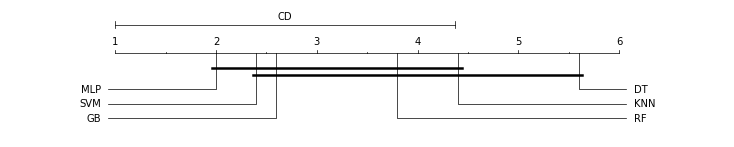

In [63]:
import Orange
warnings.filterwarnings('ignore')
names = ["DT", "KNN", "RF", "SVM", "MLP", "GB"]
avranks = [5.6, 4.4, 3.8, 2.4, 2.0, 2.6]
cd = Orange.evaluation.compute_CD(avranks, 5,alpha="0.05")
print("cd=",cd)
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=10, textspace=1.5)
plt.show()